In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
ROOT = "/mnt/stor/datasets/kaggle/rsna-intracranial-hemorrhage-detection/"
data_dir = os.path.join(ROOT, "stage_2_train_png/")
seg_dir = os.path.join(ROOT, "generated_segmentation_masks_exclude_bhsd/")

In [80]:
labels_df = pd.read_csv(os.path.join(ROOT, "train_slices_with_2dc_kfold.csv"))
edh_df = labels_df.loc[labels_df.epidural == 1]
edh_df

,SOPInstanceUID,epidural,intraparenchymal,intraventricular,subarachnoid,subdural,any,filepath,PatientID,StudyInstanceUID,SeriesInstanceUID,filepath_2dc,outer,inner0,inner1,inner2,inner3,inner4,fold
2492,ID_4719acd7e,1,0,0,1,0,1,ID_3be7cc35/ID_cf2643c5a8/ID_00dd046891/IM0009...,ID_3be7cc35,ID_cf2643c5a8,ID_00dd046891,ID_3be7cc35/ID_cf2643c5a8/ID_00dd046891/IM0008...,2,2,1,-1,0,3,2
2493,ID_d8837f9ac,1,0,0,1,0,1,ID_3be7cc35/ID_cf2643c5a8/ID_00dd046891/IM0010...,ID_3be7cc35,ID_cf2643c5a8,ID_00dd046891,ID_3be7cc35/ID_cf2643c5a8/ID_00dd046891/IM0009...,2,2,1,-1,0,3,2
2494,ID_35570c130,1,0,0,1,0,1,ID_3be7cc35/ID_cf2643c5a8/ID_00dd046891/IM0011...,ID_3be7cc35,ID_cf2643c5a8,ID_00dd046891,ID_3be7cc35/ID_cf2643c5a8/ID_00dd046891/IM0010...,2,2,1,-1,0,3,2
2495,ID_a148f85a5,1,0,0,1,0,1,ID_3be7cc35/ID_cf2643c5a8/ID_00dd046891/IM0012...,ID_3be7cc35,ID_cf2643c5a8,ID_00dd046891,ID_3be7cc35/ID_cf2643c5a8/ID_00dd046891/IM0011...,2,2,1,-1,0,3,2
2496,ID_0f1eb70e9,1,0,0,1,0,1,ID_3be7cc35/ID_cf2643c5a8/ID_00dd046891/IM0013...,ID_3be7cc35,ID_cf2643c5a8,ID_00dd046891,ID_3be7cc35/ID_cf2643c5a8/ID_00dd046891/IM0012...,2,2,1,-1,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742710,ID_1985ff23c,1,0,1,0,0,1,ID_9e89a2a1/ID_838cbeeb6f/ID_fcb5f0e009/IM0018...,ID_9e89a2a1,ID_838cbeeb6f,ID_fcb5f0e009,ID_9e89a2a1/ID_838cbeeb6f/ID_fcb5f0e009/IM0017...,3,1,3,3,-1,2,3
742711,ID_e676e3d81,1,0,1,0,0,1,ID_9e89a2a1/ID_838cbeeb6f/ID_fcb5f0e009/IM0019...,ID_9e89a2a1,ID_838cbeeb6f,ID_fcb5f0e009,ID_9e89a2a1/ID_838cbeeb6f/ID_fcb5f0e009/IM0018...,3,1,3,3,-1,2,3
751370,ID_be4c8489f,1,0,0,0,0,1,ID_1e74903a/ID_20603762d2/ID_ff8f995e19/IM0022...,ID_1e74903a,ID_20603762d2,ID_ff8f995e19,ID_1e74903a/ID_20603762d2/ID_ff8f995e19/IM0021...,4,0,3,3,1,-1,4
751371,ID_1574cc4e1,1,0,0,0,0,1,ID_1e74903a/ID_20603762d2/ID_ff8f995e19/IM0023...,ID_1e74903a,ID_20603762d2,ID_ff8f995e19,ID_1e74903a/ID_20603762d2/ID_ff8f995e19/IM0022...,4,0,3,3,1,-1,4


In [81]:
df = pd.read_csv(os.path.join(ROOT, "train_generated_segmentation_masks_kfold.csv"))
df = df.loc[df.filepath_2dc.isin(edh_df.filepath_2dc.tolist())]
df

,filepath_2dc,outer,fold,inner0,inner1,inner2,inner3,inner4,seg_filepath
121,ID_26885caa/ID_3c44049a47/ID_77b514baa7/IM0016...,4,4,0,0,4,1,-1,ID_26885caa/ID_3c44049a47/ID_77b514baa7/IM0017...
122,ID_26885caa/ID_3c44049a47/ID_77b514baa7/IM0013...,4,4,0,0,4,1,-1,ID_26885caa/ID_3c44049a47/ID_77b514baa7/IM0014...
123,ID_26885caa/ID_3c44049a47/ID_77b514baa7/IM0011...,4,4,0,0,4,1,-1,ID_26885caa/ID_3c44049a47/ID_77b514baa7/IM0012...
124,ID_26885caa/ID_3c44049a47/ID_77b514baa7/IM0008...,4,4,0,0,4,1,-1,ID_26885caa/ID_3c44049a47/ID_77b514baa7/IM0009...
125,ID_26885caa/ID_3c44049a47/ID_77b514baa7/IM0009...,4,4,0,0,4,1,-1,ID_26885caa/ID_3c44049a47/ID_77b514baa7/IM0010...
...,...,...,...,...,...,...,...,...,...
99851,ID_4966daf7/ID_f48b33db96/ID_5384d82e4c/IM0009...,1,1,2,-1,0,2,2,ID_4966daf7/ID_f48b33db96/ID_5384d82e4c/IM0010...
99856,ID_4966daf7/ID_f48b33db96/ID_5384d82e4c/IM0010...,1,1,2,-1,0,2,2,ID_4966daf7/ID_f48b33db96/ID_5384d82e4c/IM0011...
99909,ID_a51ae735/ID_3eceba86f0/ID_ada88699df/IM0005...,4,4,4,4,3,3,-1,ID_a51ae735/ID_3eceba86f0/ID_ada88699df/IM0006...
99914,ID_a51ae735/ID_3eceba86f0/ID_ada88699df/IM0007...,4,4,4,4,3,3,-1,ID_a51ae735/ID_3eceba86f0/ID_ada88699df/IM0008...


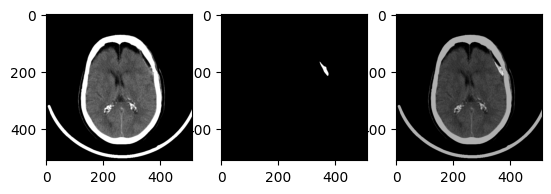

In [155]:
row = df.iloc[np.random.randint(len(df))]
img = cv2.imread(os.path.join(data_dir, row.seg_filepath), 0)
seg = cv2.imread(os.path.join(seg_dir, row.seg_filepath), 0)
seg_rescale = ((seg / seg.max()) * 255).astype("uint8")
overlay = 0.6 * img + 0.4 * seg_rescale
plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(seg, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(overlay, cmap="gray")
plt.show()